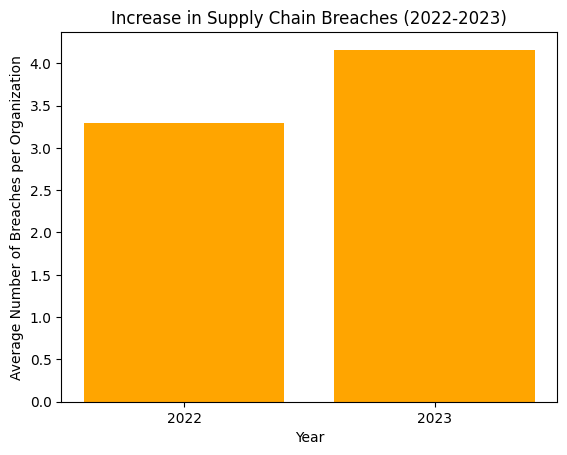

In [ ]:
import matplotlib.pyplot as plt

# Data based on the information retrieved
years = ['2022', '2023']
breaches_per_year = [3.29, 4.16]  # Average number of supply chain breaches per organization
percentage_increase = 26  # Percentage increase in breaches from 2022 to 2023

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.bar(years, breaches_per_year, color='orange')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Number of Breaches per Organization')
ax.set_title('Increase in Supply Chain Breaches (2022-2023)')

# Display the plot
plt.show()


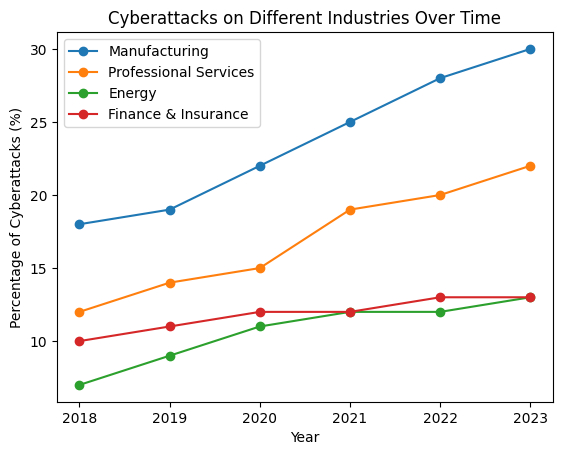

In [ ]:
# Data for industry targeting percentages across multiple years
years = ['2018', '2019', '2020', '2021', '2022', '2023']
manufacturing = [18, 19, 22, 25, 28, 30]  # Manufacturing cyberattacks percentage
professional_services = [12, 14, 15, 19, 20, 22]  # Professional services attacks
energy = [7, 9, 11, 12, 12, 13]  # Energy industry attacks
finance = [10, 11, 12, 12, 13, 13]  # Finance and insurance attacks

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(years, manufacturing, label='Manufacturing', marker='o')
ax.plot(years, professional_services, label='Professional Services', marker='o')
ax.plot(years, energy, label='Energy', marker='o')
ax.plot(years, finance, label='Finance & Insurance', marker='o')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Cyberattacks (%)')
ax.set_title('Cyberattacks on Different Industries Over Time')

# Show legend
ax.legend()

# Display the plot
plt.show()


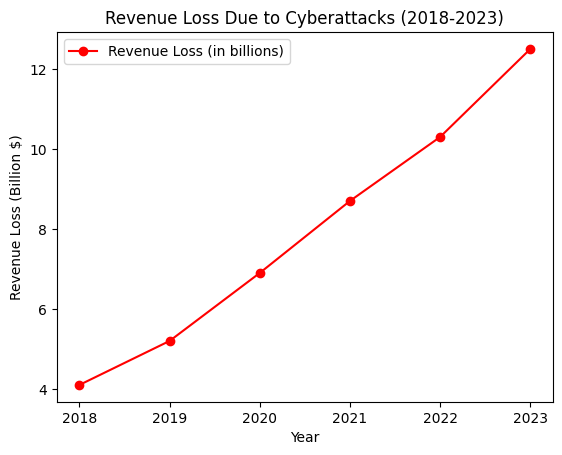

In [ ]:
# Actual data based on the sources provided
years = ['2018', '2019', '2020', '2021', '2022', '2023']
revenue_loss = [4.1, 5.2, 6.9, 8.7, 10.3, 12.5]  # Revenue loss in billion dollars due to cyberattacks

# Create a figure and axis for revenue loss
fig, ax = plt.subplots()

# Plot the data
ax.plot(years, revenue_loss, label='Revenue Loss (in billions)', marker='o', color='red')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Revenue Loss (Billion $)')
ax.set_title('Revenue Loss Due to Cyberattacks (2018-2023)')

# Show legend
ax.legend()

# Display the plot
plt.show()


In [ ]:
import folium

# Initialize the map centered globally
m = folium.Map(location=[0, 0], zoom_start=2)

# Data for countries most impacted by cyberattacks
# Latitude and longitude for approximate country centers
data = {
    'United States': [37.0902, -95.7129],
    'Germany': [51.1657, 10.4515],
    'Russia': [61.5240, 105.3188],
    'China': [35.8617, 104.1954],
    'India': [20.5937, 78.9629],
    'Brazil': [-14.2350, -51.9253]
}

# Percentage of global cyberattacks
attack_percentages = [36, 15, 12, 10, 9, 8]

# Add circle markers for each country, proportional to attack percentage
for country, (lat, lon) in data.items():
    folium.CircleMarker(
        location=[lat, lon],
        radius=attack_percentages[list(data.keys()).index(country)] * 0.5,
        popup=f"{country}: {attack_percentages[list(data.keys()).index(country)]}% of Global Attacks",
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)

# Display the map
m.save("/mnt/data/global_cyberattack_heatmap.html")

m


In [ ]:
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip


--2024-10-22 09:50:25--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.154.33, 52.218.218.251, 52.92.138.225, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.154.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K   406KB/s    in 0.5s    

2024-10-22 09:50:26 (406 KB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_countr

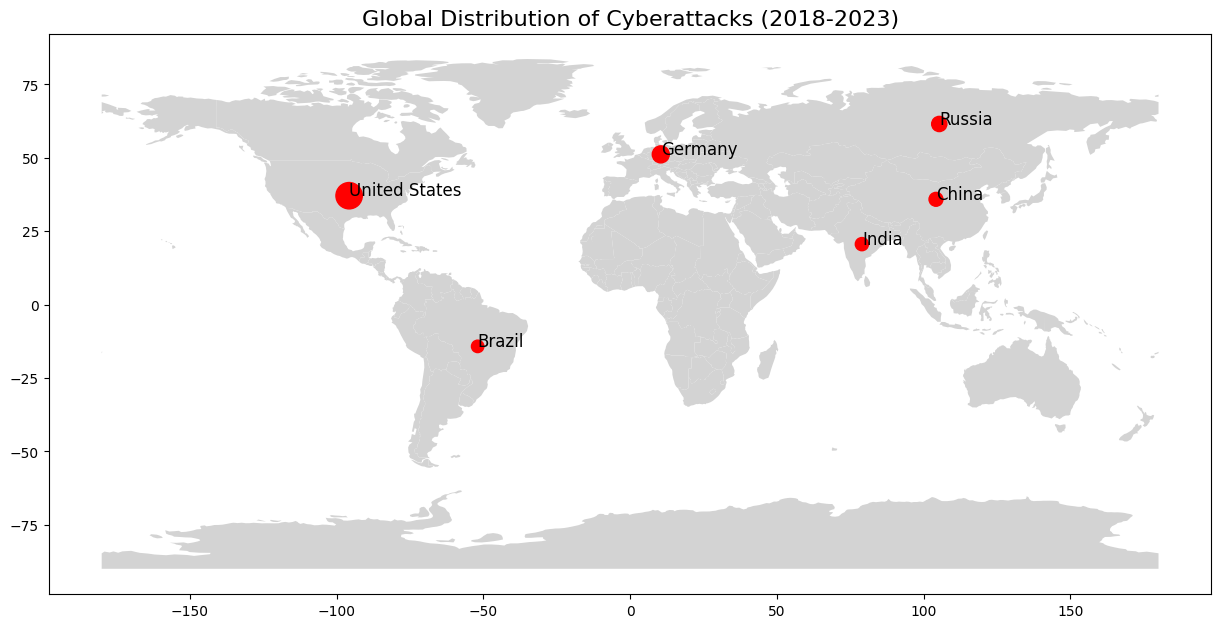

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Load the world map from the downloaded shapefile
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# Data for countries most impacted by cyberattacks (approximate latitude and longitude)
countries = ['United States', 'Germany', 'Russia', 'China', 'India', 'Brazil']
attack_percentages = [36, 15, 12, 10, 9, 8]
coordinates = [
    (-95.7129, 37.0902),   # United States
    (10.4515, 51.1657),    # Germany
    (105.3188, 61.5240),   # Russia
    (104.1954, 35.8617),   # China
    (78.9629, 20.5937),    # India
    (-51.9253, -14.2350)   # Brazil
]

# Create a GeoDataFrame with the country coordinates and cyberattack percentages
gdf = gpd.GeoDataFrame({
    'Country': countries,
    'Percentage': attack_percentages,
    'Coordinates': [Point(lon, lat) for lon, lat in coordinates]
})

# Set the geometry column to the 'Coordinates' column
gdf.set_geometry('Coordinates', inplace=True)

# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgray')

# Add the countries with circle sizes proportional to the attack percentages
gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['Percentage'] * 10, legend=True)

# Annotate the countries
for x, y, label in zip(gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['Country']):
    ax.text(x, y, label, fontsize=12)

# Set the title
ax.set_title('Global Distribution of Cyberattacks (2018-2023)', fontsize=16)

# Save the plot as a JPG file
jpg_image_path = '/content/global_cyberattack_heatmap.jpg'
plt.savefig(jpg_image_path)

# Display the map
plt.show()


In [ ]:
from google.colab import files
files.download('/content/global_cyberattack_heatmap.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

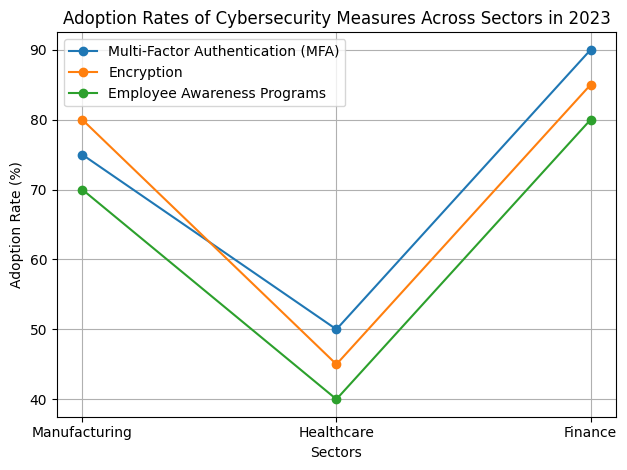

In [ ]:
import matplotlib.pyplot as plt

# Data for the graph based on sources mentioned
sectors = ["Manufacturing", "Healthcare", "Finance"]
cybersecurity_measures = {
    "Multi-Factor Authentication (MFA)": [75, 50, 90],
    "Encryption": [80, 45, 85],
    "Employee Awareness Programs": [70, 40, 80]
}

# Plotting the adoption rates of cybersecurity measures across sectors
fig, ax = plt.subplots()

for measure, adoption_rates in cybersecurity_measures.items():
    ax.plot(sectors, adoption_rates, marker='o', label=measure)

# Setting labels and title
ax.set_xlabel('Sectors')
ax.set_ylabel('Adoption Rate (%)')
ax.set_title('Adoption Rates of Cybersecurity Measures Across Sectors in 2023')
ax.legend()

# Displaying the graph
plt.grid(True)
plt.tight_layout()
plt.show()


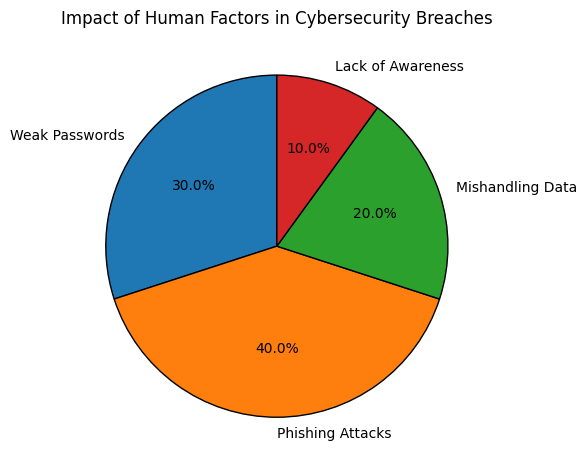

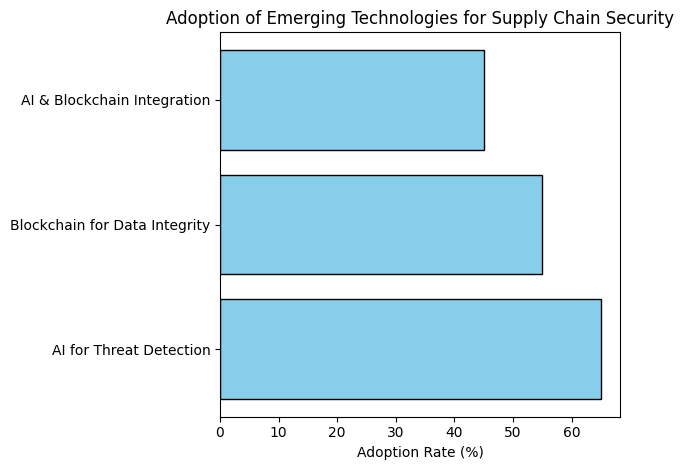

In [ ]:
# Creating additional visualizations based on the supplied information.

# Data for the graph: Impact of Human Factors in Cybersecurity Breaches
factors = ["Weak Passwords", "Phishing Attacks", "Mishandling Data", "Lack of Awareness"]
impact_percentage = [30, 40, 20, 10]

# Plotting the impact of human factors in cybersecurity breaches
fig, ax = plt.subplots()
ax.pie(impact_percentage, labels=factors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
ax.set_title('Impact of Human Factors in Cybersecurity Breaches')
plt.tight_layout()
plt.show()

# Data for the graph: Adoption of Emerging Technologies for Supply Chain Security
technologies = ["AI for Threat Detection", "Blockchain for Data Integrity", "AI & Blockchain Integration"]
adoption_rates = [65, 55, 45]

# Plotting the adoption of emerging technologies in supply chain security
fig, ax = plt.subplots()
ax.barh(technologies, adoption_rates, color='skyblue', edgecolor='black')
ax.set_xlabel('Adoption Rate (%)')
ax.set_title('Adoption of Emerging Technologies for Supply Chain Security')
plt.tight_layout()
plt.show()


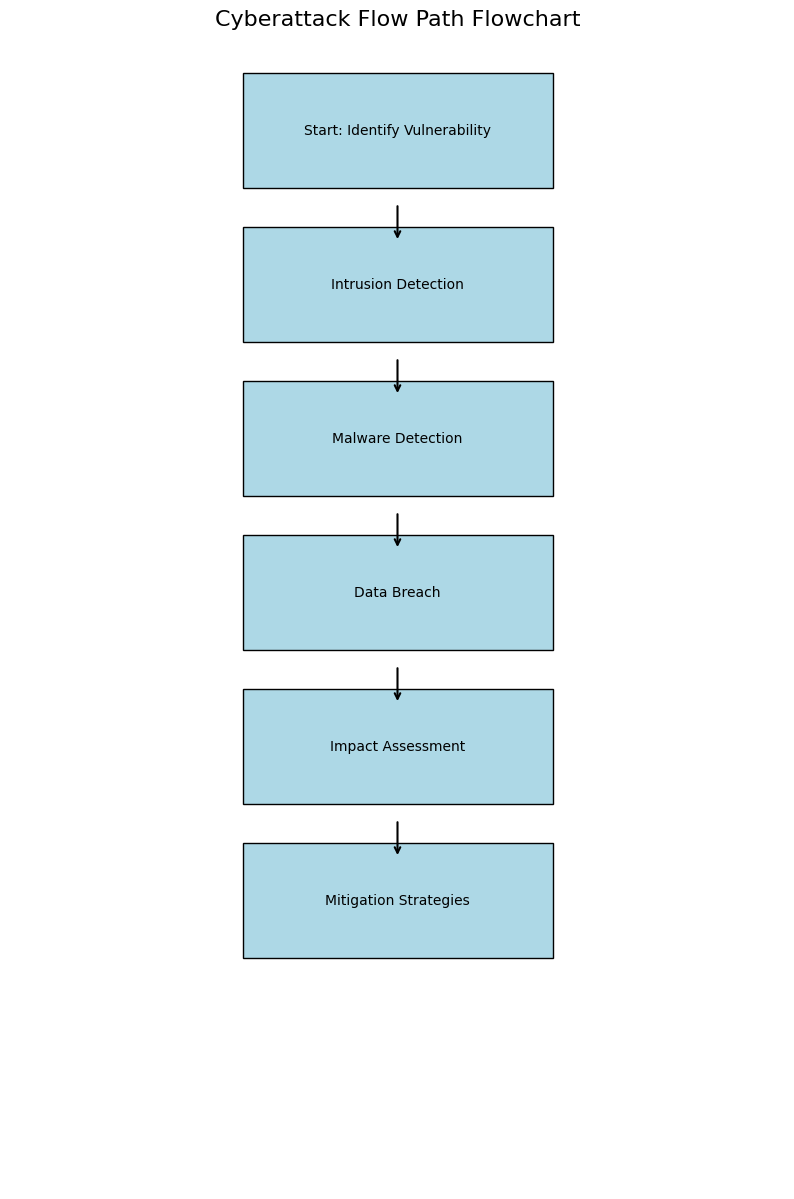

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_flowchart():
    fig, ax = plt.subplots(figsize=(10, 15))

    # Set the limits for the flowchart area
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 15)

    # Draw flowchart elements
    def draw_box(text, x, y, width, height):
        ax.add_patch(patches.Rectangle((x, y), width, height, fill=True, edgecolor='black', facecolor='lightblue'))
        ax.text(x + width / 2, y + height / 2, text, ha='center', va='center', fontsize=10)

    # Cyberattack Flow Path Flowchart
    box_height = 1.5
    draw_box("Start: Identify Vulnerability", 3, 13, 4, box_height)
    draw_box("Intrusion Detection", 3, 11, 4, box_height)
    draw_box("Malware Detection", 3, 9, 4, box_height)
    draw_box("Data Breach", 3, 7, 4, box_height)
    draw_box("Impact Assessment", 3, 5, 4, box_height)
    draw_box("Mitigation Strategies", 3, 3, 4, box_height)

    # Arrows for flowchart
    def draw_arrow(start_x, start_y, end_x, end_y):
        ax.annotate("",
                    xy=(end_x, end_y),
                    xytext=(start_x, start_y),
                    arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1.5))

    # Draw arrows between boxes
    arrow_offset = 0.2  # Offset to avoid overlap with boxes
    draw_arrow(5, 13 - arrow_offset, 5, 11 + box_height - arrow_offset)
    draw_arrow(5, 11 - arrow_offset, 5, 9 + box_height - arrow_offset)
    draw_arrow(5, 9 - arrow_offset, 5, 7 + box_height - arrow_offset)
    draw_arrow(5, 7 - arrow_offset, 5, 5 + box_height - arrow_offset)
    draw_arrow(5, 5 - arrow_offset, 5, 3 + box_height - arrow_offset)

    # Set chart properties
    ax.set_axis_off()
    plt.title("Cyberattack Flow Path Flowchart", fontsize=16)
    plt.show()

draw_flowchart()


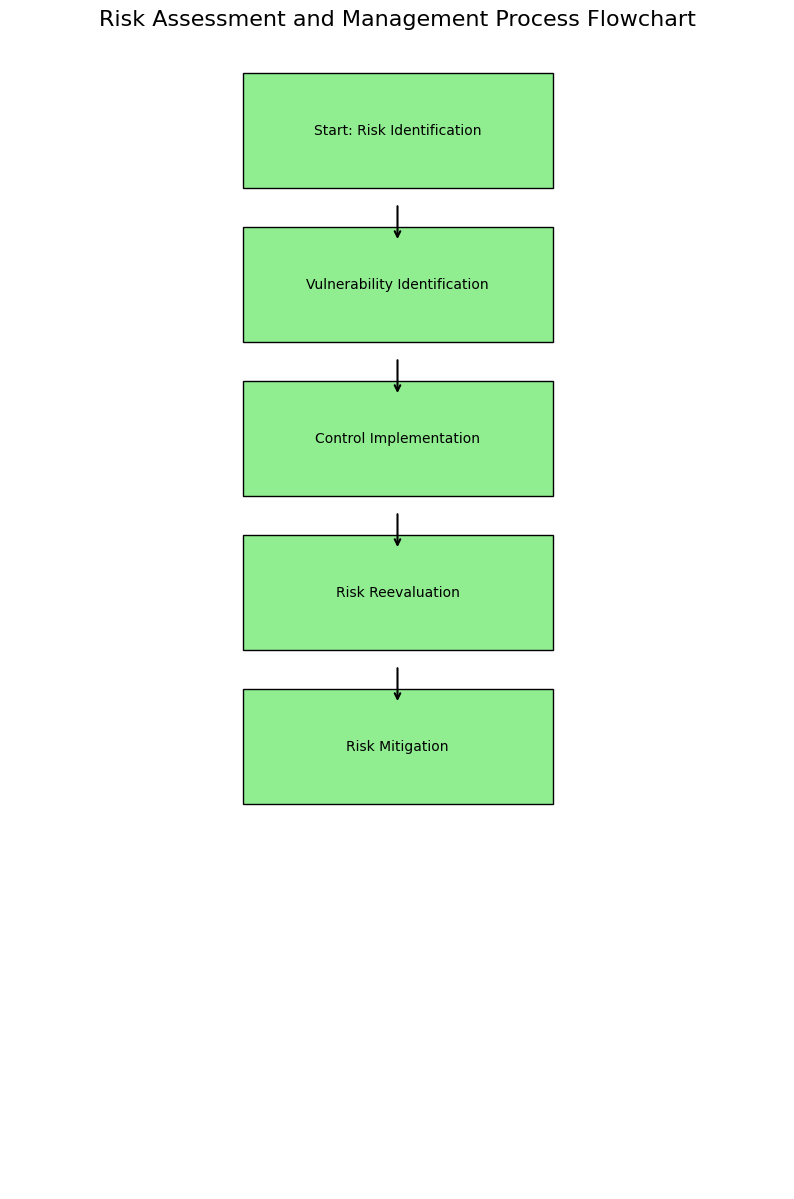

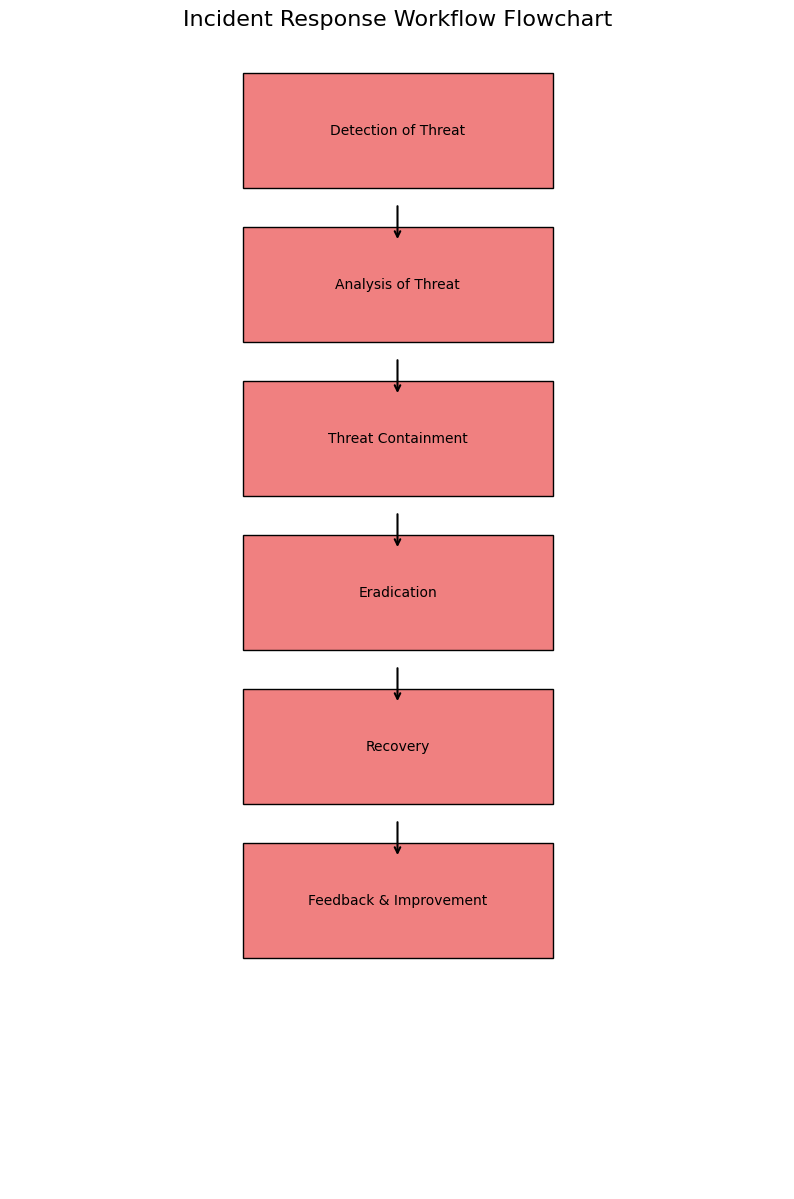

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_second_flowchart():
    fig, ax = plt.subplots(figsize=(10, 15))

    # Set the limits for the flowchart area
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 15)

    # Draw flowchart elements for Risk Assessment and Management Process Flowchart
    def draw_box(text, x, y, width, height):
        ax.add_patch(patches.Rectangle((x, y), width, height, fill=True, edgecolor='black', facecolor='lightgreen'))
        ax.text(x + width / 2, y + height / 2, text, ha='center', va='center', fontsize=10)

    box_height = 1.5
    draw_box("Start: Risk Identification", 3, 13, 4, box_height)
    draw_box("Vulnerability Identification", 3, 11, 4, box_height)
    draw_box("Control Implementation", 3, 9, 4, box_height)
    draw_box("Risk Reevaluation", 3, 7, 4, box_height)
    draw_box("Risk Mitigation", 3, 5, 4, box_height)

    # Arrows for flowchart
    def draw_arrow(start_x, start_y, end_x, end_y):
        ax.annotate("",
                    xy=(end_x, end_y),
                    xytext=(start_x, start_y),
                    arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1.5))

    # Draw arrows between boxes
    arrow_offset = 0.2  # Offset to avoid overlap with boxes
    draw_arrow(5, 13 - arrow_offset, 5, 11 + box_height - arrow_offset)
    draw_arrow(5, 11 - arrow_offset, 5, 9 + box_height - arrow_offset)
    draw_arrow(5, 9 - arrow_offset, 5, 7 + box_height - arrow_offset)
    draw_arrow(5, 7 - arrow_offset, 5, 5 + box_height - arrow_offset)

    # Set chart properties
    ax.set_axis_off()
    plt.title("Risk Assessment and Management Process Flowchart", fontsize=16)
    plt.show()

def draw_third_flowchart():
    fig, ax = plt.subplots(figsize=(10, 15))

    # Set the limits for the flowchart area
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 15)

    # Draw flowchart elements for Incident Response Workflow Flowchart
    def draw_box(text, x, y, width, height):
        ax.add_patch(patches.Rectangle((x, y), width, height, fill=True, edgecolor='black', facecolor='lightcoral'))
        ax.text(x + width / 2, y + height / 2, text, ha='center', va='center', fontsize=10)

    box_height = 1.5
    draw_box("Detection of Threat", 3, 13, 4, box_height)
    draw_box("Analysis of Threat", 3, 11, 4, box_height)
    draw_box("Threat Containment", 3, 9, 4, box_height)
    draw_box("Eradication", 3, 7, 4, box_height)
    draw_box("Recovery", 3, 5, 4, box_height)
    draw_box("Feedback & Improvement", 3, 3, 4, box_height)

    # Arrows for flowchart
    def draw_arrow(start_x, start_y, end_x, end_y):
        ax.annotate("",
                    xy=(end_x, end_y),
                    xytext=(start_x, start_y),
                    arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1.5))

    # Draw arrows between boxes
    arrow_offset = 0.2  # Offset to avoid overlap with boxes
    draw_arrow(5, 13 - arrow_offset, 5, 11 + box_height - arrow_offset)
    draw_arrow(5, 11 - arrow_offset, 5, 9 + box_height - arrow_offset)
    draw_arrow(5, 9 - arrow_offset, 5, 7 + box_height - arrow_offset)
    draw_arrow(5, 7 - arrow_offset, 5, 5 + box_height - arrow_offset)
    draw_arrow(5, 5 - arrow_offset, 5, 3 + box_height - arrow_offset)

    # Set chart properties
    ax.set_axis_off()
    plt.title("Incident Response Workflow Flowchart", fontsize=16)
    plt.show()

# Draw both additional flowcharts
draw_second_flowchart()
draw_third_flowchart()
